# Classification

\# | Rank | Classifier | Options | Dataset | Score
--- | --- | --- | --- | ---| ---
1 |1 |SVM/C | `kernel='rbf', C=6.6, gamma=0.35` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `kernel='rbf', C=3.9, gamma=0.59` | Cleaned+MinMaxScaled | `0.978873239436`
1 |1 |SVM/C | `C=2.0` | Cleaned+MinMaxScaled | `0.973958333333`
2 |1 |SVM/C | `C=4.9` | Cleaned+RobustScaled | `0.973958333333`
3 |3 |SVM/C | `kernel='rbf', C=3.9` | Cleaned+MinMaxScaled | `0.967391304347`
4 |3 |SVM/C | `kernel='sigmoid', C=9.6` | Cleaned+MinMaxScaled | `0.967391304347`
5 |5 |RandomForest | `n_estimators=70` | Cleaned | `0.953125000000`
6 |5 |RandomForest | `n_estimators=70` | Cleaned+MinMaxScaled | `0.953125000000`
7 |5 |SVM/C | `C=2.6` | Cleaned+QuantileTransformed | `0.953125000000`
8 |8 |SVM/C | `C=4.3` | Cleaned | `0.947916666667`
9 |8 |RandomForest | `n_estimators=16` | Cleaned+RobustScaled | `0.947916666667`
10|8 |RandomForest | `n_estimators=32` | Cleaned+QuantileTransformed | `0.947916666667`
11|11|RandomForest | `n_estimators=90` | Full | `0.942708333333`
12|12|SVM/C | `default` | Full | `0.932291666667`

Default options:

- RandomForest with `n_estimators=50`, `oob_score=True` and `random_state=123456`.
- SVM/C with `kernel=linear`, `C=1.0`.

Normalizing all columns but `num_holes`.

In [1]:
# IMPORTS AND NOTEBOOK SETUP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# IMPORTING OUR DATASET
data_full = pd.read_csv('../dataset-numpy/dataset.csv')
data_clean_manual = pd.read_csv('../dataset-numpy/dataset-clean-manual.csv')
data_ext_clean_manual = pd.read_csv('../dataset-numpy/dataset-extended-clean-manual.csv')
data_clean_manual.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,291.653385,44.952083,10.493405,13.664167,15.859298,15.380416,2.320312,42.125000,38.457292,4.064063,...,3.515104,31.285937,36.993750,6.548958,1.218229,37.840625,39.710417,6.739583,0.379688,4.532813
std,67.428881,8.744703,0.889372,0.814930,1.193617,1.869070,3.623932,13.615466,15.544662,8.440119,...,5.690358,19.265783,14.245519,6.925247,2.723832,14.236761,16.414749,9.965595,0.584767,2.868122
min,153.000000,20.000000,8.303587,11.549360,11.835737,10.582800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,39.000000,9.822737,13.067626,15.077516,14.116460,0.000000,36.000000,29.000000,0.000000,...,0.000000,15.000000,28.000000,0.000000,0.000000,31.000000,33.000000,0.000000,0.000000,2.000000
50%,275.500000,44.000000,10.369215,13.617666,15.797984,15.295089,0.000000,45.000000,40.000000,0.000000,...,0.000000,32.000000,38.000000,5.000000,0.000000,40.000000,44.000000,2.000000,0.000000,5.000000
75%,326.000000,51.000000,11.043633,14.191667,16.571982,16.354908,4.000000,52.000000,50.000000,4.000000,...,6.000000,48.000000,47.000000,11.000000,1.000000,47.000000,51.000000,10.000000,1.000000,7.000000
max,512.000000,88.000000,13.117590,16.446964,20.410788,20.841542,22.000000,64.000000,64.000000,62.000000,...,39.000000,64.000000,64.000000,31.000000,29.000000,64.000000,64.000000,55.000000,2.000000,9.000000


## Normalization

In [3]:
columns = ['area', 'contours', 'radius', 'hull_radius', 'centroid_x', 'centroid_y']
COUNT = 4
for x in range(COUNT):
    for y in range(COUNT):
        columns.append('_'.join(['weight', str(x), str(y)]))
        
def scale(scaler):
    return pd.DataFrame(scaler.fit_transform(data_clean_manual[columns]), columns=columns)

### MinMaxScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaled = data_clean_manual.copy()
minmaxscaled[columns] = scale(MinMaxScaler())
minmaxscaled.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.386221,0.366942,0.454885,0.431804,0.469217,0.467661,0.105469,0.658203,0.600895,0.065549,...,0.090131,0.488843,0.578027,0.211257,0.042008,0.591260,0.620475,0.122538,0.379688,4.532813
std,0.187824,0.128599,0.184747,0.166394,0.139196,0.182193,0.164724,0.212742,0.242885,0.136131,...,0.145907,0.301028,0.222586,0.223395,0.093925,0.222449,0.256480,0.181193,0.584767,2.868122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253482,0.279412,0.315569,0.310002,0.378048,0.344453,0.000000,0.562500,0.453125,0.000000,...,0.000000,0.234375,0.437500,0.000000,0.000000,0.484375,0.515625,0.000000,0.000000,2.000000
50%,0.341226,0.352941,0.429087,0.422310,0.462067,0.459344,0.000000,0.703125,0.625000,0.000000,...,0.000000,0.500000,0.593750,0.161290,0.000000,0.625000,0.687500,0.036364,0.000000,5.000000
75%,0.481894,0.455882,0.569182,0.539510,0.552328,0.562653,0.181818,0.812500,0.781250,0.064516,...,0.153846,0.750000,0.734375,0.354839,0.034483,0.734375,0.796875,0.181818,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000


### RobustScaler

In [5]:
from sklearn.preprocessing import RobustScaler

robustscaled = data_clean_manual.copy()
robustscaled[columns] = scale(RobustScaler())
robustscaled.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1920.000000,1920.000000,1.920000e+03,1.920000e+03,1.920000e+03,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,0.196993,0.079340,1.017201e-01,4.136941e-02,4.102775e-02,0.038119,0.580078,-0.179688,-0.073462,1.016016,...,0.585851,-0.021638,-0.052961,0.140814,1.218229,-0.134961,-0.238310,0.473958,0.379688,4.532813
std,0.822303,0.728725,7.284580e-01,7.250003e-01,7.986912e-01,0.834985,0.905983,0.850967,0.740222,2.110030,...,0.948393,0.583812,0.749764,0.629568,2.723832,0.889798,0.911930,0.996559,0.584767,2.868122
min,-1.493902,-2.000000,-1.691895e+00,-1.840064e+00,-2.651279e+00,-2.105159,0.000000,-2.812500,-1.904762,0.000000,...,0.000000,-0.969697,-2.000000,-0.454545,0.000000,-2.500000,-2.444444,-0.200000,0.000000,0.000000
25%,-0.384146,-0.416667,-4.476046e-01,-4.893416e-01,-4.820904e-01,-0.526539,0.000000,-0.562500,-0.523810,0.000000,...,0.000000,-0.515152,-0.526316,-0.454545,0.000000,-0.562500,-0.611111,-0.200000,0.000000,2.000000
50%,0.000000,0.000000,7.274827e-16,-7.901665e-16,5.943054e-16,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,0.615854,0.583333,5.523954e-01,5.106584e-01,5.179096e-01,0.473461,1.000000,0.437500,0.476190,1.000000,...,1.000000,0.484848,0.473684,0.545455,1.000000,0.437500,0.388889,0.800000,1.000000,7.000000
max,2.884146,3.666667,2.251112e+00,2.517077e+00,3.086590e+00,2.477812,5.500000,1.187500,1.142857,15.500000,...,6.500000,0.969697,1.368421,2.363636,29.000000,1.500000,1.111111,5.300000,2.000000,9.000000


### QuantileTransformer

In [6]:
from sklearn.preprocessing import QuantileTransformer

quantiletransformed = data_clean_manual.copy()
quantiletransformed[columns] = scale(QuantileTransformer())
quantiletransformed.describe()

,area,contours,radius,hull_radius,centroid_x,centroid_y,weight_0_0,weight_0_1,weight_0_2,weight_0_3,...,weight_2_0,weight_2_1,weight_2_2,weight_2_3,weight_3_0,weight_3_1,weight_3_2,weight_3_3,num_holes,label
count,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,...,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1920.000000,1920.000000
mean,4.999974e-01,5.000066e-01,4.999996e-01,5.000034e-01,4.999984e-01,4.999982e-01,3.476723e-01,5.000201e-01,4.999338e-01,3.040906e-01,...,3.541981e-01,4.985454e-01,5.000751e-01,4.382782e-01,2.425205e-01,4.997604e-01,5.000615e-01,3.952468e-01,0.379688,4.532813
std,2.888959e-01,2.887092e-01,2.888972e-01,2.889019e-01,2.888986e-01,2.888992e-01,3.955703e-01,2.889265e-01,2.891776e-01,3.990423e-01,...,3.943233e-01,2.916285e-01,2.889566e-01,3.562232e-01,3.891705e-01,2.893259e-01,2.903445e-01,3.811212e-01,0.584767,2.868122
min,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,...,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,1.000000e-07,0.000000,0.000000
25%,2.502503e-01,2.577578e-01,2.497667e-01,2.500801e-01,2.501045e-01,2.499021e-01,1.000000e-07,2.537538e-01,2.567568e-01,1.000000e-07,...,1.000000e-07,2.512513e-01,2.532533e-01,1.000000e-07,1.000000e-07,2.422422e-01,2.517518e-01,1.000000e-07,0.000000,2.000000
50%,5.010010e-01,4.809810e-01,4.998480e-01,5.000105e-01,4.999102e-01,4.999490e-01,1.000000e-07,5.080080e-01,4.894895e-01,1.000000e-07,...,1.000000e-07,5.010010e-01,4.889890e-01,5.055055e-01,1.000000e-07,5.100100e-01,5.025025e-01,5.200200e-01,0.000000,5.000000
75%,7.507508e-01,7.597598e-01,7.500140e-01,7.501820e-01,7.502810e-01,7.502003e-01,7.677678e-01,7.492492e-01,7.472472e-01,7.477477e-01,...,7.612613e-01,7.492492e-01,7.447447e-01,7.392392e-01,7.467467e-01,7.482482e-01,7.567568e-01,7.462462e-01,1.000000,7.000000
max,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,...,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,9.999999e-01,2.000000,9.000000


## Splitting the dataset

In [7]:
def split_data(data, split, validation):
    border = int(len(data) * split)
    train_data = data[:border]
    test_data = data[border:]

    assert len(train_data) + len(test_data) == len(data), "Invalid split!"

    X_train = train_data.iloc[:,:-1]
    Y_train = train_data.iloc[:,-1]

    X_test = test_data.iloc[validation:,:-1]
    Y_test = test_data.iloc[validation:,-1]
    
    X_validate = test_data.iloc[:validation,:-1]
    Y_validate = test_data.iloc[:validation,-1]
    return X_train, Y_train, X_test, Y_test, X_validate, Y_validate

X_train, Y_train, X_test, Y_test, X_validate, Y_validate = split_data(minmaxscaled, .2, 0)

## Try Random Forest Classifier

In [8]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

top_rf = (2, 0.0)
for n_e in range(2, 101):
    rf = RandomForestClassifier(n_estimators=n_e, oob_score=True, random_state=123456)
    rf.fit(X_train, Y_train)
    score = rf.score(X_test, Y_test)
    if score > top_rf[1]:
        top_rf = (n_e, score)
        print('N_E:', n_e, 'Score:', score)
print('Top:', top_rf)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


('N_E:', 2, 'Score:', 0.71484375)
('N_E:', 3, 'Score:', 0.80078125)
('N_E:', 4, 'Score:', 0.83463541666666663)
('N_E:', 5, 'Score:', 0.84440104166666663)
('N_E:', 6, 'Score:', 0.85221354166666663)
('N_E:', 7, 'Score:', 0.861328125)
('N_E:', 8, 'Score:', 0.86848958333333337)
('N_E:', 9, 'Score:', 0.87174479166666663)
('N_E:', 10, 'Score:', 0.87760416666666663)
('N_E:', 11, 'Score:', 0.888671875)
('N_E:', 12, 'Score:', 0.88997395833333337)
('N_E:', 13, 'Score:', 0.892578125)
('N_E:', 15, 'Score:', 0.89778645833333337)
('N_E:', 17, 'Score:', 0.89973958333333337)
('N_E:', 18, 'Score:', 0.90104166666666663)
('N_E:', 20, 'Score:', 0.90299479166666663)
('N_E:', 22, 'Score:', 0.90950520833333337)
('N_E:', 32, 'Score:', 0.91145833333333337)
('N_E:', 33, 'Score:', 0.916015625)
('N_E:', 44, 'Score:', 0.91666666666666663)
('N_E:', 46, 'Score:', 0.91731770833333337)
('N_E:', 49, 'Score:', 0.91927083333333337)
('N_E:', 54, 'Score:', 0.92122395833333337)
('N_E:', 55, 'Score:', 0.92317708333333337)
('

## Try Support Vector Machine

In [9]:
# SVM
from sklearn import svm

svc = svm.SVC(kernel='linear')
svc.fit(X_train, Y_train)
print('Score:', svc.score(X_test, Y_test))

('Score:', 0.93294270833333337)


### Predicting some validation values

In [10]:
for i in range(len(X_validate)):
    sample = np.array(X_validate.iloc[i,:], dtype=pd.Series).reshape(1, -1)
    label = Y_validate.iloc[i]
    prediction = svc.predict(sample)[0]
    print('prediction:', prediction, '== label', label, ':', prediction == label)

### Finding the optimal C value

In [11]:
Cs = np.arange(.1, 10, 0.1)
scores = np.zeros((len(Cs)))
index = 0
top = (.1, 0)
for c in Cs:
    print('%d / %d' % (index, len(Cs)-1))
    svc = svm.SVC(kernel='linear', C=c)
    svc.fit(X_train, Y_train)
    score = svc.score(X_test, Y_test)
    scores[index] = score
    if score > top[1]:
        top = (c, score)
    index += 1

print('Top:', top)

0 / 98
1 / 98
2 / 98
3 / 98
4 / 98
5 / 98
6 / 98
7 / 98
8 / 98
9 / 98
10 / 98
11 / 98
12 / 98
13 / 98
14 / 98
15 / 98
16 / 98
17 / 98
18 / 98
19 / 98
20 / 98
21 / 98
22 / 98
23 / 98
24 / 98
25 / 98
26 / 98
27 / 98
28 / 98
29 / 98
30 / 98
31 / 98
32 / 98
33 / 98
34 / 98
35 / 98
36 / 98
37 / 98
38 / 98
39 / 98
40 / 98
41 / 98
42 / 98
43 / 98
44 / 98
45 / 98
46 / 98
47 / 98
48 / 98
49 / 98
50 / 98
51 / 98
52 / 98
53 / 98
54 / 98
55 / 98
56 / 98
57 / 98
58 / 98
59 / 98
60 / 98
61 / 98
62 / 98
63 / 98
64 / 98
65 / 98
66 / 98
67 / 98
68 / 98
69 / 98
70 / 98
71 / 98
72 / 98
73 / 98
74 / 98
75 / 98
76 / 98
77 / 98
78 / 98
79 / 98
80 / 98
81 / 98
82 / 98
83 / 98
84 / 98
85 / 98
86 / 98
87 / 98
88 / 98
89 / 98
90 / 98
91 / 98
92 / 98
93 / 98
94 / 98
95 / 98
96 / 98
97 / 98
98 / 98
('Top:', (1.9000000000000001, 0.94010416666666663))


('Max:', 0.94010416666666663)


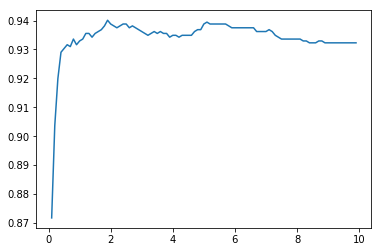

In [12]:
print('Max:', scores.max())
plt.plot(Cs, scores)

### Finding the optimal gamma for RBF kernel

In [13]:
Gs = [.35]#np.arange(.01, 1, .01)
Cs = np.arange(.1, 10, .1)

steps = len(Gs) * len(Cs)
scores = np.zeros((steps))
index = 0
top = (.1, .01, 0)

for g in Gs:
    for c in Cs:
        print('%d / %d' % (index, steps))
        svc = svm.SVC(kernel='rbf', C=c, gamma=g)
        svc.fit(X_train, Y_train)
        score = svc.score(X_test, Y_test)
        scores[index] = score
        if score > top[2]:
            top = (c, g, score)
        index += 1

print('Top:', top)

0 / 99
1 / 99
2 / 99
3 / 99
4 / 99
5 / 99
6 / 99
7 / 99
8 / 99
9 / 99
10 / 99
11 / 99
12 / 99
13 / 99
14 / 99
15 / 99
16 / 99
17 / 99
18 / 99
19 / 99
20 / 99
21 / 99
22 / 99
23 / 99
24 / 99
25 / 99
26 / 99
27 / 99
28 / 99
29 / 99
30 / 99
31 / 99
32 / 99
33 / 99
34 / 99
35 / 99
36 / 99
37 / 99
38 / 99
39 / 99
40 / 99
41 / 99
42 / 99
43 / 99
44 / 99
45 / 99
46 / 99
47 / 99
48 / 99
49 / 99
50 / 99
51 / 99
52 / 99
53 / 99
54 / 99
55 / 99
56 / 99
57 / 99
58 / 99
59 / 99
60 / 99
61 / 99
62 / 99
63 / 99
64 / 99
65 / 99
66 / 99
67 / 99
68 / 99
69 / 99
70 / 99
71 / 99
72 / 99
73 / 99
74 / 99
75 / 99
76 / 99
77 / 99
78 / 99
79 / 99
80 / 99
81 / 99
82 / 99
83 / 99
84 / 99
85 / 99
86 / 99
87 / 99
88 / 99
89 / 99
90 / 99
91 / 99
92 / 99
93 / 99
94 / 99
95 / 99
96 / 99
97 / 99
98 / 99
('Top:', (6.4000000000000004, 0.35, 0.94466145833333337))


## Try SGD

In [31]:
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter=1000)
sgd.fit(X_train, Y_train)
score = sgd.score(X_test, Y_test)
print(score)

0.93359375


## Combining Automation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

datasets = [
    ('Cleaned+MinMaxScaled', minmaxscaled),
    ('Cleaned+RobustScaled', robustscaled),
    ('Cleaned+QuartileTransformed', quantiletransformed),
    ('Cleaned', data_clean_manual),
    ('Full', data_full)
]

options = {
    'AdaBoost': {
        'base_estimator': [
            svm.SVC(kernel='rbf', C=4, gamma=0.5),
            RandomForestClassifier(n_estimators=69)
        ],
        'algorithm': ['SAMME']
    },
    'SVM/C': {
        'kernel': ('linear', 'rbf', 'sigmoid', 'poly'),
        'C': range(1, 10),
        'gamma': [.01, .05, .1, .5, 1, 3, 5]
    },
    'RandomForest': {
        'n_estimators': range(1, 101)
    }
}

classifiers = [
    ('AdaBoost', AdaBoostClassifier),
    ('SVM/C', svm.SVC),
    ('RandomForest', RandomForestClassifier)
]

def search(classifiers, options, datasets, test_size, random_state):
    for dataset in datasets:
        X_train, X_test, Y_train, Y_test = train_test_split(dataset[1].iloc[:,:-1], dataset[1].iloc[:,-1],\
                                                            test_size=test_size, random_state=random_state)
        
        for classifier in classifiers:
            key = classifier[0]
            print 'Testing', dataset[0], 'on', key, '...'

            model = GridSearchCV(classifier[1](), options[key], verbose=0)
            model.fit(X_train, Y_train)
            print 'Params:', model.best_params_
            print 'MSE:', model.best_score_
            print 'Score:', model.score(X_test, Y_test)
            print

search(classifiers, options, datasets, .25, 123456)

Testing Cleaned+MinMaxScaled on AdaBoost ...
Params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=69, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'algorithm': 'SAMME'}
MSE: 0.947916666667
Score: 0.952083333333

Testing Cleaned+MinMaxScaled on SVM/C ...
Params: {'kernel': 'poly', 'C': 1, 'gamma': 0.5}
MSE: 0.972222222222
Score: 0.960416666667

Testing Cleaned+MinMaxScaled on RandomForest ...
Params: {'n_estimators': 97}
MSE: 0.954166666667
Score: 0.960416666667

Testing Cleaned+RobustScaled on AdaBoost ...
Params: {'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_featur

## Confusion Matrix

('Accuracy', 0.94010416666666663)


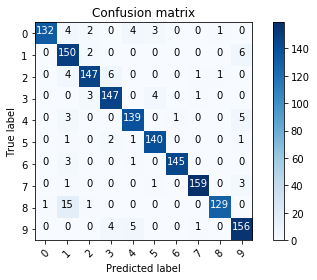

In [32]:
from sklearn.metrics import confusion_matrix
import itertools

best = svm.SVC(kernel='linear', C=1.9)

Y_pred = best.fit(X_train, Y_train).predict(X_test)

def plot_confusion_matrix(cm, classes):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

print('Accuracy', best.score(X_test, Y_test))
plot_confusion_matrix(cnf_matrix, classes=range(0,10))

plt.show()